# Best Data Science Online Course

There has been a great rise in the demand for data science professionals in the job market and there aren't enough professionals to fill these roles. The time it will take to get a degree in this field coupled with the shortage of universities that provide this course in their institutions adds to this problem. Thank God for online courses which are easily accessible and very effective in guiding a determined mind in the data science space.

In this project I will scrape the [Class Central](https://www.classcentral.com)'s website for the list of data science course, customer ratings and some other information to use in decideing the best course to enrol in.

In [1]:
# conda install selenium

^C

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
driver = webdriver.Chrome()

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'webdriver-manager.'




====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\ADESOYE\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


In [266]:
# Data Science Features
Course = []
Institute = []
Duration = []
Start_Date = []
provider = []
No_Of_Reviews = []
Rating = []
cost = []

In [267]:
#Extract Course Features
for i in range(1, 92):
    driver.get('https://www.classcentral.com/subject/data-science?page={}'.format(i))
    content = driver.page_source
    soup = BeautifulSoup(content)
    stew = soup.findAll("li",{'class' : 'bg-white border-all border-gray-light padding-xsmall radius-small margin-bottom-small medium-up-padding-horz-large medium-up-padding-vert-medium course-list-course'})
    
    for item in stew:
        #Course name
        Course.append(str(item.find("h2",{'class' : 'text-1 weight-semi line-tight margin-bottom-xxsmall'}).string))
        
        # Provider
        provider.append(item.find('a',href=True, attrs={'class':'hover-underline color-charcoal text-3 margin-left-small line-tight'}).string.strip())
        
        # rating and no. of reviews:
        lu = {'zero': 0, 'one':1, 'two':2, 'three': 3, 'four':4, 'five':5}
        rat = item.find('span', attrs={'class':'cmpt-rating-medium'})['aria-label']
        rat = rat.split(' ')[:-4]
        if lu[rat[0].lower()] == 0:
            Rating.append(0)
            No_Of_Reviews.append(0)
        else:
            review = item.find('span', {'class' : 'text-3 color-gray margin-left-xxsmall'}).contents[0]
            No_Of_Reviews.append(review)
            if len(rat) == 1:
                Rating.append(lu[rat[0].lower()])
            else:
                Rating.append(lu[rat[0].lower()] + 0.5)
        
        #duration
        WD = item.find('span', {'aria-label' : "Workload and duration" })
        if WD == None:
            Duration.append('None')
        else:
            Duration.append(WD.string.strip())
        
        #price
        price = item.find('span', {'aria-label' :"Pricing"})
        cost.append(price.string.strip())

In [268]:
df = pd.DataFrame({'course':Course,'provider': provider, 'ratings': Rating, 'no. of reviews': No_Of_Reviews, 'duration': Duration, 'price': cost})
df

,course,provider,ratings,no. of reviews,duration,price
0,The Data Scientist’s Toolbox,Coursera,3.5,166,"18 hours worth of material, 4 weeks long",Free Online Course (Audit)
1,R Programming,Coursera,3.0,246,"57 hours worth of material, 4 weeks long",Free Online Course (Audit)
2,Computational Social Science,Coursera,5.0,87,"3 hours a week, 26 weeks long",Paid Course
3,Getting and Cleaning Data,Coursera,3.5,57,"19 hours worth of material, 4 weeks long",Free Online Course (Audit)
4,The Analytics Edge,edX,4.5,80,"10-15 hours a week, 13 weeks long",Free Online Course (Audit)
...,...,...,...,...,...,...
1357,Building Resilient Streaming Systems on Google...,Coursera,0.0,0,"6-8 hours a week, 1 week long",Paid Course
1358,Serverless Data Analysis with Google BigQuery ...,Coursera,0.0,0,"6-8 hours a week, 1 week long",Paid Course
1359,Data Analysis: Essential Skills,edX,0.0,0,"2-4 hours a week, 16 weeks long",Paid Course
1360,Data Science Fundamentals,edX,0.0,0,"2-3 hours a week, 24 weeks long",Paid Course


In [269]:
#change no. of reviews' data type
df['no. of reviews'] = df['no. of reviews'].astype(int)

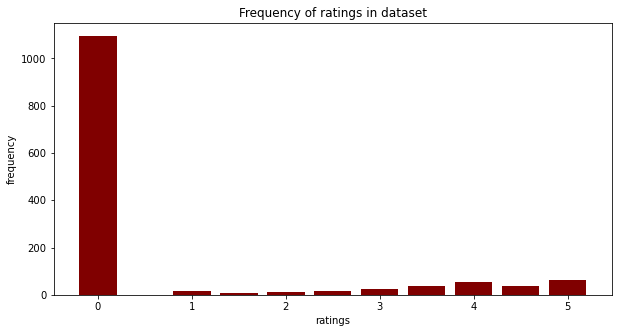

In [277]:
ratings_values_freq = df.groupby('ratings').count().reset_index().iloc[:,[0,1]]

import matplotlib.pyplot as plt
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(ratings_values_freq['ratings'], ratings_values_freq['course'], color ='maroon',
        width = 0.4)
 
plt.xlabel("ratings")
plt.ylabel("frequency")
plt.title("Frequency of ratings in dataset")
plt.show()

Most of the courses listed have zero rating. The courses with zero rating are those with zero reviews. It is best to exclude them from the dataset since we cannot deduce how good they are from this site.

In [278]:
df = df[df['no. of reviews'] > 0].sort_values('no. of reviews', ascending = False).reset_index(drop = True)
df

,course,provider,ratings,no. of reviews,duration,price
0,R Programming,Coursera,3.0,246,"57 hours worth of material, 4 weeks long",Free Online Course (Audit)
1,The Data Scientist’s Toolbox,Coursera,3.5,166,"18 hours worth of material, 4 weeks long",Free Online Course (Audit)
2,Computational Social Science,Coursera,5.0,87,"3 hours a week, 26 weeks long",Paid Course
3,The Analytics Edge,edX,4.5,80,"10-15 hours a week, 13 weeks long",Free Online Course (Audit)
4,Become a Data Analyst,Udacity,4.5,66,"10 hours a week, 17 weeks long",Paid Course
...,...,...,...,...,...,...
262,Introduction to Data Science,edX,1.0,1,"3-6 hours a week, 6 weeks long",Free Online Course (Audit)
263,SQL for Data Science,edX,1.0,1,"2-4 hours a week, 4 weeks long",Free Online Course (Audit)
264,Análisis Estadístico de datos con R,Miríadax,1.0,1,6 weeks long,Free Online Course
265,Databases and SQL for Data Science with Python,Coursera,2.0,1,"19 hours worth of material, 6 weeks long",Free Online Course (Audit)


In [279]:
df.describe()

,ratings,no. of reviews
count,267.000000,267.000000
mean,3.752809,10.018727
std,1.125049,21.678001
min,1.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,3.000000
75%,4.500000,10.000000
max,5.000000,246.000000


As shown above, 50% of the reviewed courses had no more than 3 reviewers. The reviews for these courses are most likely to be biased. To increase our confidence in what choice we make, we will make sure whichever course we select as the best will have at least 9 reviewers. 

In [280]:
df = df[df['no. of reviews'] > 8].reset_index(drop = True)
df

,course,provider,ratings,no. of reviews,duration,price
0,R Programming,Coursera,3.0,246,"57 hours worth of material, 4 weeks long",Free Online Course (Audit)
1,The Data Scientist’s Toolbox,Coursera,3.5,166,"18 hours worth of material, 4 weeks long",Free Online Course (Audit)
2,Computational Social Science,Coursera,5.0,87,"3 hours a week, 26 weeks long",Paid Course
3,The Analytics Edge,edX,4.5,80,"10-15 hours a week, 13 weeks long",Free Online Course (Audit)
4,Become a Data Analyst,Udacity,4.5,66,"10 hours a week, 17 weeks long",Paid Course
...,...,...,...,...,...,...
70,More Data Mining with Weka,Independent,5.0,9,5 weeks long,Free Online Course
71,Data Visualization and Communication with Tableau,Coursera,4.0,9,"24 hours worth of material, 5 weeks long",Free Online Course (Audit)
72,"Applied Plotting, Charting & Data Representati...",Coursera,2.5,9,"20 hours worth of material, 4 weeks long",Free Online Course (Audit)
73,Managing Data Analysis,Coursera,2.5,9,"8 hours worth of material, 1 week long",Free Online Course (Audit)


In [289]:
df.groupby('price')['ratings'].mean().reset_index()

,price,ratings
0,Free Online Course,4.350000
1,Free Online Course (Audit),3.577586
2,Free Trial Available,4.000000
3,Paid Course,4.100000


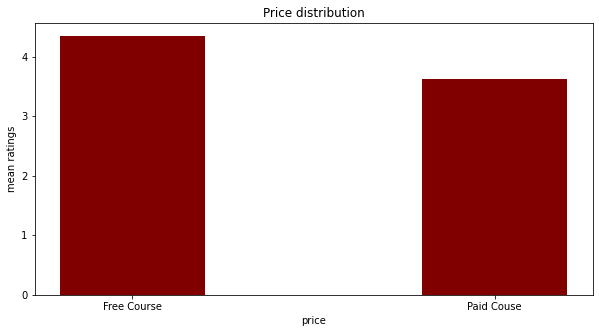

In [297]:
rating_distribution = {'Free Course': df[df['price'] == 'Free Online Course'].describe().loc['mean', 'ratings'],
                       'Paid Couse':df[df['price'] != 'Free Online Course'].describe().loc['mean', 'ratings']}
course_type = list(rating_distribution.keys())
mean_rating = list(rating_distribution.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(course_type, mean_rating, color ='maroon',
        width = 0.4)
 
plt.xlabel("course type")
plt.ylabel("mean ratings")
plt.title("Ratings distribution")
plt.show()

The Free Online Courses are rated higher. Some possible reasons for this are:
- free courses are sometimes used to get a sense of what a field is about so its beneficiaries might be more generous with their praise than course buyers.
- course buyers have more to lose than just their time to lose so they will tend to be more critical.

In [299]:
# Top ten paid courses sorted by no. of reviews
df[df['price'] != 'Free Online Course'].head(10)

,course,provider,ratings,no. of reviews,duration,price
0,R Programming,Coursera,3.0,246,"57 hours worth of material, 4 weeks long",Free Online Course (Audit)
1,The Data Scientist’s Toolbox,Coursera,3.5,166,"18 hours worth of material, 4 weeks long",Free Online Course (Audit)
2,Computational Social Science,Coursera,5.0,87,"3 hours a week, 26 weeks long",Paid Course
3,The Analytics Edge,edX,4.5,80,"10-15 hours a week, 13 weeks long",Free Online Course (Audit)
4,Become a Data Analyst,Udacity,4.5,66,"10 hours a week, 17 weeks long",Paid Course
5,Getting and Cleaning Data,Coursera,3.5,57,"19 hours worth of material, 4 weeks long",Free Online Course (Audit)
6,Python for Data Science,edX,4.5,47,"8-10 hours a week, 10 weeks long",Free Online Course (Audit)
7,Introduction to Data Science in Python,Coursera,2.5,46,"30 hours worth of material, 4 weeks long",Free Online Course (Audit)
8,Introducción a la Ciencia de Datos con Python,edX,5.0,46,"6-8 hours a week, 4 weeks long",Free Online Course (Audit)
9,Big Data Analysis with Apache Spark,edX,4.5,43,"5-10 hours a week, 4 weeks long",Free Online Course (Audit)


In [301]:
# Top ten free courses sorted by no. of reviews
df[df['price'] == 'Free Online Course'].head(10)

,course,provider,ratings,no. of reviews,duration,price
10,Python for Data Science,Swayam,4.5,42,4 weeks long,Free Online Course
12,Spatial Data Science: The New Frontier in Anal...,Independent,5.0,41,"2-3 hours a week, 6 weeks long",Free Online Course
34,Intro to Hadoop and MapReduce,Udacity,4.0,21,4 weeks long,Free Online Course
41,Data Mining with Weka,Independent,5.0,19,None,Free Online Course
45,Data Analysis with R,Udacity,4.5,18,8 weeks long,Free Online Course
51,DCO042 - Python For Informatics,Independent,4.5,14,None,Free Online Course
57,Intro to Data Science,Udacity,4.0,13,8 weeks long,Free Online Course
60,Big Data for Better Performance,Open2Study,3.5,11,4 weeks long,Free Online Course
70,More Data Mining with Weka,Independent,5.0,9,5 weeks long,Free Online Course
74,Making Sense of Data,Independent,3.5,9,3 weeks long,Free Online Course


If you are beginner and you are not sure which course to take, you could start with the free courses to get a grasp of the field. But remember the best way of learning is by working on real-world projects as it's done at [Hamoye](https://www.hamoye.com) **:)**